<a href="https://colab.research.google.com/github/zhuofachen/Emotion-detection/blob/master/Plot_figures.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [73]:
import itertools
import matplotlib.pyplot as plt  
from mpl_toolkits.axes_grid1 import make_axes_locatable
import numpy as np
import os
import pandas as pd

def plot_confusion_matrix(cm, labels_name, title, acc):
    cm = cm / cm.sum(axis=1)[:, np.newaxis]  # 归一化
    thresh = cm.max() / 2
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, "{:0.2f}".format(cm[i, j]),
                     horizontalalignment="center",
                     color="white" if cm[i, j] > thresh else "black")
    
    im = plt.imshow(cm, interpolation='nearest', cmap = 'Blues')  # 在特定的窗口上显示图像
    plt.title(title)  # 图像标题
    plt.colorbar(im)
    num_class = np.array(range(len(labels_name)))  # 获取标签的间隔数
    plt.xticks(num_class, labels_name, rotation=90)  # 将标签印在x轴坐标上
    plt.yticks(num_class, labels_name)  # 将标签印在y轴坐标上
    plt.ylabel('Target')
    plt.xlabel('Prediction')
    plt.imshow(cm, interpolation='nearest', cmap=plt.get_cmap('Blues'))
    # plt.tight_layout()
    plt.rcParams.update({'font.size': 10})
    plt.savefig("confusionMatrix.png", bbox_inches = 'tight')
    plt.show()




# plt.figure()
# ax = plt.gca()
# im = ax.imshow(np.arange(100).reshape((10,10)))

# # create an axes on the right side of ax. The width of cax will be 5%
# # of ax and the padding between cax and ax will be fixed at 0.05 inch.
# divider = make_axes_locatable(ax)
# cax = divider.append_axes("right", size="5%", pad=0.05)



[[314   3  38  18  54  12  28]
 [ 15  34   1   1   5   0   0]
 [ 44   0 277  13  88  32  42]
 [  8   0   8 807  11  13  48]
 [ 63   0  57  20 415   9  89]
 [ 10   0  28  14   5 348  10]
 [ 30   0  17  44  85   6 425]]


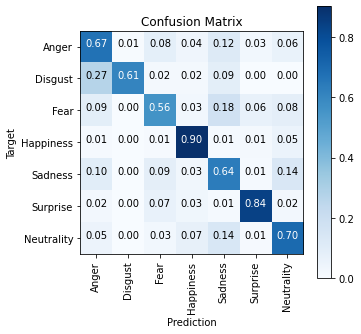

In [75]:
label_names = ['Anger', 'Disgust', 'Fear', 'Happiness', 'Sadness', 'Surprise', 'Neutrality']

confuse_mat = []
confuse_mat = pd.read_excel('comfusion matrix.xlsx', header = None)
confuse_mat = np.array(confuse_mat)
print(confuse_mat)
plt.figure(figsize = (5, 5))
plot_confusion_matrix(confuse_mat, label_names, 'Confusion Matrix', 73.01)



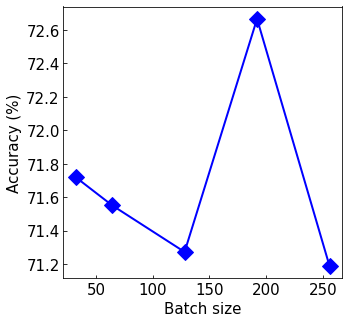

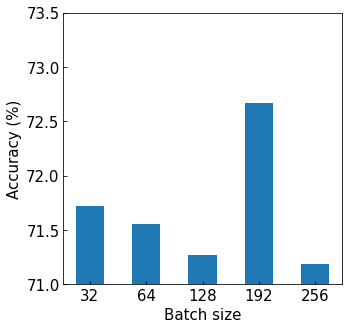

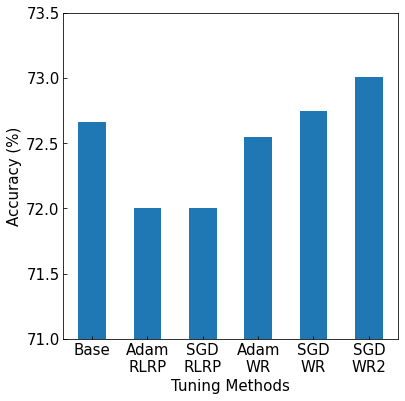

In [102]:
# evalute results of different optimized models
batch_size = [32, 64, 128, 192, 256]
colors = ['chocolate',  'goldenrod', 'olivedrab', 'royalblue',]
accuracy = [71.7191, 71.5520,  71.2733, 72.6665, 71.1897]
plt.figure(figsize = (5, 5))
plt.plot(batch_size, accuracy, marker='D', color='blue', linewidth=2, markersize=12)
plt.xlabel('Batch size')
plt.ylabel('Accuracy (%)')
plt.rcParams.update({'font.size': 15})
plt.tick_params(direction='in')
plt.show()

plt.figure(figsize = (5, 5))
batch_size2 = ['32', '64', '128', '192', '256']
barlist = plt.bar(batch_size2, accuracy, width = 0.5)
plt.xlabel('Batch size')
plt.ylabel('Accuracy (%)')
plt.ylim([71, 73.5])
plt.rcParams.update({'font.size': 15})
plt.tick_params(direction='in')
plt.show()



# # accuracy = [94, 96, 98, 99]  # for GCV
# accuracy = [97.5, 97.5, 98, 99]  # for GDV
# print(accuracy)
# f3 = plt.figure(figsize=(4,4)) 
# # plt.boxplot(accuracy)
# barlist = plt.bar(models, accuracy, width = 0.5)
# for i in range(4):
#     barlist[i].set_color(colors[i])
    
# plt.tick_params(direction='in')

# plt.ylim([70, 100])
# plt.ylabel("Accuracy (%)")
# plt.rcParams.update({'font.size': 12})
# plt.show()



plt.figure(figsize = (6, 6))
methods = ['Base', 'Adam\nRLRP', 'SGD\nRLRP', 'Adam\nWR', 'SGD\nWR',  'SGD\nWR2']
# acc = [73.01, 72.75,  72.55, 72.66]
acc = [72.66, 72, 72, 72.55,  72.75, 73.01]
barlist = plt.bar(methods, acc, width = 0.5)
plt.xlabel('Tuning Methods')
plt.ylabel('Accuracy (%)')
plt.ylim([71, 73.5])
plt.rcParams.update({'font.size': 15})
plt.tick_params(direction='in')
plt.show()